In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.io import read_image, decode_image
from IPython.display import display

In [44]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64)),
    # transforms.RandomHorizontalFlip(),
    # transforms.RandomRotation(30)
])
train_dataset = torchvision.datasets.CIFAR10("./data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32 ,shuffle=True)

test_dataset = torchvision.datasets.CIFAR10("./data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32)

Files already downloaded and verified
Files already downloaded and verified


In [45]:
images, labels = next(iter(test_loader))
print(images.shape)

torch.Size([32, 3, 64, 64])


In [46]:
grid = make_grid(images, nrow=4)

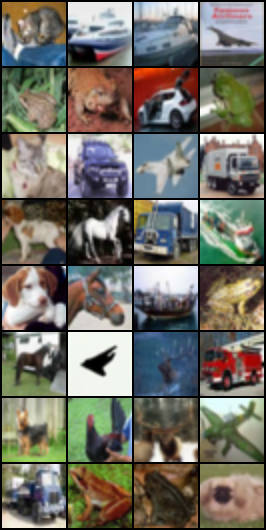

In [47]:
img_show = torchvision.transforms.ToPILImage()(grid)
display(img_show)

In [52]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(256*32*32, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.4)
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(x.size()[0], -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [53]:
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [54]:
epochs = 10
loss_list = []
for epoch in range(epochs):
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        pred = model(images)
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())
    print(loss.item())
        

1.5536051988601685


KeyboardInterrupt: 